In [6]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ml4sbu_path = kagglehub.competition_download('ml4sbu')

print('Data source import complete.')


Data source import complete.


# Machine Learning - Assignment 4
# Mohammad Hossein Basouli

# Imports

In [8]:
!pip install catboost

In [9]:
# Standard library imports
import os
import time

# Third-party imports
import joblib
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configure plotting style
plt.style.use('ggplot')

# Set pandas display option
pd.set_option('display.max_columns', 35)

# Imbalanced-learn
from imblearn.over_sampling import SMOTE

# Scikit-learn - Model selection & pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# Scikit-learn - Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scikit-learn - Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn - Metrics & inspection
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Other ML libraries
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Orientation

In [10]:
df = pd.read_csv('/root/.cache/kagglehub/competitions/ml4sbu/train.csv')

In [11]:
df.shape

(1341, 35)

In [12]:
df.head()

,Unnamed: 0,age_years,travel_freq,daily_salary,work_division,commute_distance,education_level,degree_field,headcount,env_satisfaction,sex,hourly_wage,job_engagement,position_level,job_title,job_satisfaction,marital_state,monthly_earnings,monthly_salary,companies_count,is_adult,overtime_status,salary_increase_pct,performance_score,relation_satisfaction,std_work_hours,stock_level,career_years,trainings_last_year,work_life_score,tenure_years,years_current_role,years_post_promotion,years_with_manager,left_company
0,0,27,frequent_travel,1302,rnd,2,2,life_sci,1,2,male,62,3,2,health_rep,2,divorced,4240,19121,1,yes,no,16,3,2,80,1,8,5,3,8,7,0,1,0
1,1,32,rare_travel,1476,rnd,28,2,life_sci,1,1,male,81,3,2,mfg_dir,4,married,5473,4060,3,yes,no,14,3,2,80,0,8,3,3,4,1,1,3,0
2,2,44,rare_travel,1275,rnd,9,2,medical,1,3,male,95,3,1,lab_tech,4,married,3579,17725,0,yes,no,21,4,4,80,1,10,2,3,9,8,1,7,0
3,3,46,rare_travel,1320,sales,24,4,marketing,1,4,male,48,2,3,sales_exec,1,divorced,10512,23343,1,yes,no,14,3,3,80,1,28,3,3,22,11,15,8,0
4,4,42,rare_travel,442,rnd,1,4,life_sci,1,1,male,72,2,3,health_rep,4,married,7441,15596,2,yes,yes,23,4,3,80,1,10,3,1,8,7,0,7,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1341 non-null   int64 
 1   age_years              1341 non-null   int64 
 2   travel_freq            1341 non-null   object
 3   daily_salary           1341 non-null   int64 
 4   work_division          1341 non-null   object
 5   commute_distance       1341 non-null   int64 
 6   education_level        1341 non-null   int64 
 7   degree_field           1341 non-null   object
 8   headcount              1341 non-null   int64 
 9   env_satisfaction       1341 non-null   int64 
 10  sex                    1341 non-null   object
 11  hourly_wage            1341 non-null   int64 
 12  job_engagement         1341 non-null   int64 
 13  position_level         1341 non-null   int64 
 14  job_title              1341 non-null   object
 15  job_satisfaction     

# Exploratory Data Analysis

In [14]:
df.isna().sum()

,0
Unnamed: 0,0
age_years,0
travel_freq,0
daily_salary,0
work_division,0
commute_distance,0
education_level,0
degree_field,0
headcount,0
env_satisfaction,0


<Axes: xlabel='left_company', ylabel='count'>

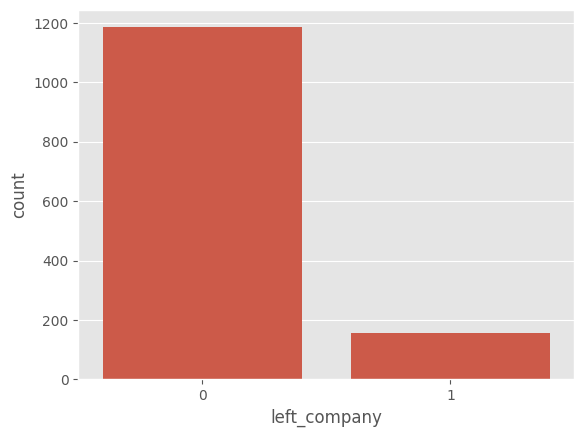

In [15]:
sns.countplot(df, x='left_company')

In [16]:
cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    print(f'Unique Values for {col}:')
    print(df[col].value_counts())
    print('----------------------------')

Unique Values for travel_freq:
travel_freq
rare_travel        1027
frequent_travel     210
no_travel           104
Name: count, dtype: int64
----------------------------
Unique Values for work_division:
work_division
rnd      926
sales    384
hr        31
Name: count, dtype: int64
----------------------------
Unique Values for degree_field:
degree_field
life_sci     618
medical      436
marketing    123
tech_deg      95
other         57
hr            12
Name: count, dtype: int64
----------------------------
Unique Values for sex:
sex
male      849
female    492
Name: count, dtype: int64
----------------------------
Unique Values for job_title:
job_title
sales_exec      291
research_sci    276
lab_tech        256
mfg_dir         164
health_rep      123
manager          83
sales_rep        63
research_dir     59
hr               26
Name: count, dtype: int64
----------------------------
Unique Values for marital_state:
marital_state
married     621
single      451
divorced    269
Name: co

In [17]:
df.duplicated().sum(axis=0)

np.int64(0)

<Axes: >

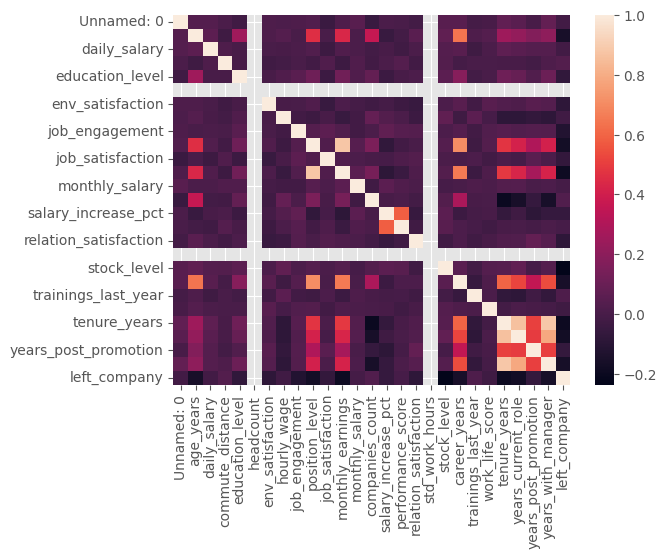

In [18]:
sns.heatmap(df.corr(method='spearman', numeric_only=True))

In [19]:
df.drop(columns=['Unnamed: 0', 'is_adult'], inplace=True)

In [20]:
cat_cols = df.select_dtypes(exclude='number').columns
df = pd.get_dummies(data=df , columns=cat_cols, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age_years                1341 non-null   int64
 1   daily_salary             1341 non-null   int64
 2   commute_distance         1341 non-null   int64
 3   education_level          1341 non-null   int64
 4   headcount                1341 non-null   int64
 5   env_satisfaction         1341 non-null   int64
 6   hourly_wage              1341 non-null   int64
 7   job_engagement           1341 non-null   int64
 8   position_level           1341 non-null   int64
 9   job_satisfaction         1341 non-null   int64
 10  monthly_earnings         1341 non-null   int64
 11  monthly_salary           1341 non-null   int64
 12  companies_count          1341 non-null   int64
 13  salary_increase_pct      1341 non-null   int64
 14  performance_score        1341 non-null   int64
 15  rela

# Models

## Splitting

In [21]:
X, y = df.drop(columns=['left_company']), df['left_company']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Hyperparameter Tuning

In [22]:
def tune_and_save_models(X_train, y_train, model_dir='saved_models'):
    os.makedirs(model_dir, exist_ok=True)

    param_grids = {
        'LR': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))
            ]),
            'params': {'clf__C': [0.01, 0.1, 1, 10, 100]}
        },
        'SVM': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC(probability=True, random_state=42, class_weight='balanced'))
            ]),
            'params': {'clf__C': [0.1, 1], 'clf__kernel': ['rbf'], 'clf__decision_function_shape': ['ovo']}
        },
        'LDA': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LDA())  # LDA does not support class_weight
            ]),
            'params': [
              {
                  'clf__solver': ['svd']
              },
              {
                  'clf__solver': ['lsqr'],
                  'clf__shrinkage': ['auto', 0.1, 0.3, 0.5]
              },
              {
                  'clf__solver': ['eigen'],
                  'clf__shrinkage': ['auto', 0.1, 0.3, 0.5]
              }
            ]
        },
        'RF': {
            'model': RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [10, 15],
                'min_samples_leaf': [2, 5, 8],
                'min_samples_split': [4, 8, 10],
                'max_features': ['sqrt', 'log2'],
                'bootstrap': [True],
                'n_jobs': [-1],
                'oob_score': [True],
            }
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 150, 200],
                'learning_rate': [0.35, 0.5, 1.0, 1.5]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42, scale_pos_weight=1),
            'params': {
                'n_estimators': [100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 5],
                'subsample': [0.8, 1],
            }
        },
        'LightGBM': {
            'model': LGBMClassifier(random_state=42, verbosity=-1, class_weight='balanced'),
            'params': {
                'n_estimators': [100, 150],
                'learning_rate': [0.05, 0.1],
                'max_depth': [8, 10],
                'min_child_samples': [5, 10],
                'subsample': [0.8, 1],
                'colsample_bytree': [0.8, 1],
                'lambda_l2': [0.01, 0.1, 2],
            }
        },
        'CatBoost': {
            'model': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced'),
            'params': {
                'iterations': [150, 200, 300, 500],
                'learning_rate': [0.01, 0.05, 0.1],
                'depth': [3, 4, 5, 6],

            }
        },
        # 'MultinomialNB': {
        #     'model': Pipeline([
        #         ('scaler', MinMaxScaler()),
        #         ('clf', MultinomialNB())
        #     ]),
        #     'params': {'clf__alpha': [0.1, 0.5, 1.0, 1.5]}
        # }
    }

    for name, cfg in param_grids.items():
        print(f"\n🔍 Tuning {name}...")
        start_time = time.time()

        grid = GridSearchCV(cfg['model'], cfg['params'], cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
        grid.fit(X_train, y_train)
        duration = time.time() - start_time

        best_model = grid.best_estimator_
        best_score = grid.best_score_
        best_index = grid.best_index_
        std_test = grid.cv_results_['std_test_score'][best_index]
        mean_train_score = grid.cv_results_['mean_train_score'][best_index]
        std_train = grid.cv_results_['std_train_score'][best_index]

        print(f"✅ Best F1 (Validation): {best_score:.4f} ± {std_test:.4f}")
        print(f"🧪 Best F1 (Train): {mean_train_score:.4f} ± {std_train:.4f}")
        print(f"⚙️  Best Parameters: {grid.best_params_}")
        print(f"⏱️  Time taken: {duration:.2f} seconds")

        model_path = os.path.join(model_dir, f"{name}_best_model.pkl")
        joblib.dump(best_model, model_path)
        print(f"💾 Saved {name} best model to: {model_path}")


In [23]:
tune_and_save_models(X_resampled, y_resampled)


🔍 Tuning LR...
✅ Best F1 (Validation): 0.8800 ± 0.1342
🧪 Best F1 (Train): 0.9178 ± 0.0255
⚙️  Best Parameters: {'clf__C': 0.01}
⏱️  Time taken: 6.20 seconds
💾 Saved LR best model to: saved_models/LR_best_model.pkl

🔍 Tuning SVM...
✅ Best F1 (Validation): 0.8992 ± 0.1623
🧪 Best F1 (Train): 0.9663 ± 0.0146
⚙️  Best Parameters: {'clf__C': 1, 'clf__decision_function_shape': 'ovo', 'clf__kernel': 'rbf'}
⏱️  Time taken: 12.36 seconds
💾 Saved SVM best model to: saved_models/SVM_best_model.pkl

🔍 Tuning LDA...
✅ Best F1 (Validation): 0.8760 ± 0.1508
🧪 Best F1 (Train): 0.9170 ± 0.0252
⚙️  Best Parameters: {'clf__shrinkage': 0.3, 'clf__solver': 'lsqr'}
⏱️  Time taken: 2.89 seconds
💾 Saved LDA best model to: saved_models/LDA_best_model.pkl

🔍 Tuning RF...
✅ Best F1 (Validation): 0.9265 ± 0.0770
🧪 Best F1 (Train): 0.9964 ± 0.0016
⚙️  Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'n_jobs': -1, 'oob_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:08:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best F1 (Validation): 0.9151 ± 0.1123
🧪 Best F1 (Train): 1.0000 ± 0.0000
⚙️  Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
⏱️  Time taken: 20.97 seconds
💾 Saved XGBoost best model to: saved_models/XGBoost_best_model.pkl

🔍 Tuning LightGBM...
✅ Best F1 (Validation): 0.9230 ± 0.1017
🧪 Best F1 (Train): 1.0000 ± 0.0000
⚙️  Best Parameters: {'colsample_bytree': 0.8, 'lambda_l2': 0.01, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 5, 'n_estimators': 100, 'subsample': 0.8}
⏱️  Time taken: 159.86 seconds
💾 Saved LightGBM best model to: saved_models/LightGBM_best_model.pkl

🔍 Tuning CatBoost...
✅ Best F1 (Validation): 0.9209 ± 0.1170
🧪 Best F1 (Train): 1.0000 ± 0.0000
⚙️  Best Parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
⏱️  Time taken: 204.58 seconds
💾 Saved CatBoost best model to: saved_models/CatBoost_best_model.pkl


## Evaluation

In [24]:
def evaluate_models(X_train, y_train, X_val, y_val, model_dir='saved_models'):
    val_results = {}
    train_results = {}
    trained_models = {}

    plt.figure(figsize=(12, 8))

    model_files = [f for f in os.listdir(model_dir) if f.endswith('_best_model.pkl')]
    for file in model_files:
        name = file.split('_best_model.pkl')[0]
        model_path = os.path.join(model_dir, file)
        model = joblib.load(model_path)

        print(f"\n🔁 Retraining and evaluating {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model  # Store retrained model

        # Predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # --- Classification Reports ---
        print(f"\n📘 {name} - Training Classification Report:")
        print(classification_report(y_train, y_train_pred))

        print(f"\n📗 {name} - Validation Classification Report:")
        print(classification_report(y_val, y_val_pred))

        # --- ROC AUC ---
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)

        auc_val = auc(fpr_val, tpr_val)
        auc_train = auc(fpr_train, tpr_train)

        val_results[name] = auc_val
        train_results[name] = auc_train

        plt.plot(fpr_val, tpr_val, label=f'{name} Val AUC={auc_val:.2f}')
        plt.plot(fpr_train, tpr_train, linestyle='--', alpha=0.5, label=f'{name} Train AUC={auc_train:.2f}')

    # Final ROC Plot
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves - Train (dashed) vs Validation (solid)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # --- Summary ---
    print("\n📊 Summary of ROC AUC Scores:")
    print(f"{'Model':<12} {'Train AUC':>12} {'Validation AUC':>18}")
    print("-" * 42)
    for name in sorted(val_results.keys()):
        print(f"{name:<12} {train_results[name]:>12.4f} {val_results[name]:>18.4f}")

    return trained_models



🔁 Retraining and evaluating SVM...

📘 SVM - Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       947
           1       0.99      0.93      0.96       947

    accuracy                           0.96      1894
   macro avg       0.97      0.96      0.96      1894
weighted avg       0.97      0.96      0.96      1894


📗 SVM - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       238
           1       0.40      0.13      0.20        31

    accuracy                           0.88       269
   macro avg       0.65      0.55      0.56       269
weighted avg       0.84      0.88      0.85       269


🔁 Retraining and evaluating LR...

📘 LR - Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       947
           1       0.94      0.89      0.9

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:14:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📘 XGBoost - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00       947

    accuracy                           1.00      1894
   macro avg       1.00      1.00      1.00      1894
weighted avg       1.00      1.00      1.00      1894


📗 XGBoost - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       238
           1       0.37      0.23      0.28        31

    accuracy                           0.87       269
   macro avg       0.64      0.59      0.60       269
weighted avg       0.84      0.87      0.85       269


🔁 Retraining and evaluating LightGBM...

📘 LightGBM - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00       947

   

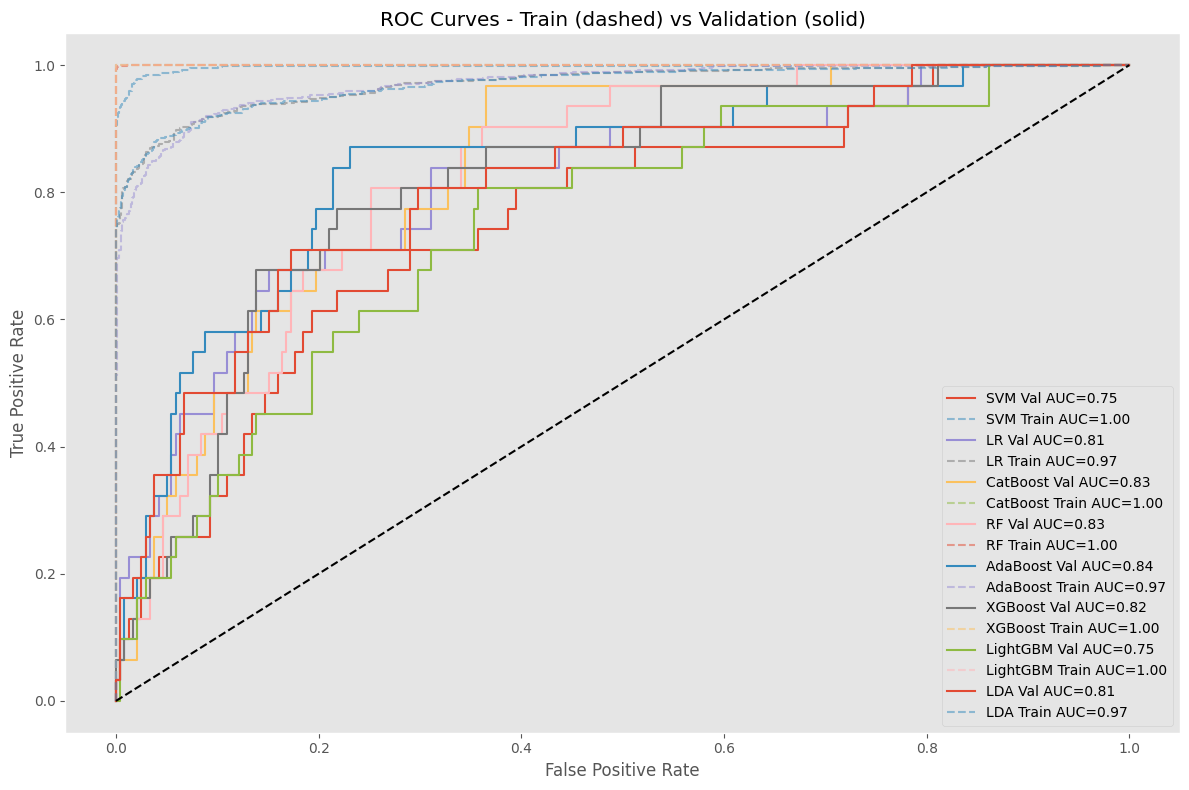


📊 Summary of ROC AUC Scores:
Model           Train AUC     Validation AUC
------------------------------------------
AdaBoost           0.9709             0.8409
CatBoost           1.0000             0.8332
LDA                0.9700             0.8097
LR                 0.9706             0.8116
LightGBM           1.0000             0.7491
RF                 1.0000             0.8265
SVM                0.9971             0.7543
XGBoost            1.0000             0.8172


In [25]:
trained_models = evaluate_models(X_resampled, y_resampled, X_val, y_val)

# Obtaining Result for Test

In [26]:
test_df = pd.read_csv('/root/.cache/kagglehub/competitions/ml4sbu/test.csv')
sample_df = pd.read_csv('/root/.cache/kagglehub/competitions/ml4sbu/sample_submission.csv')

In [27]:
test_df = test_df.drop(columns=['Unnamed: 0', 'is_adult'])
cat_cols_test_df = test_df.select_dtypes(exclude='number').columns
test_df = pd.get_dummies(data=test_df , columns=cat_cols_test_df, drop_first=True)

In [28]:
X_test = test_df

In [29]:
from sklearn.ensemble import VotingClassifier
import os
import pandas as pd

def predict_and_save(models_dict, X_test, sample_df, output_dir='predictions'):
    os.makedirs(output_dir, exist_ok=True)

    # Extract IDs
    ids = sample_df['ID']

    # Individual model predictions
    for model_name, model in models_dict.items():
        print(f"📤 Predicting with {model_name}...")

        # Predict
        y_pred = model.predict(X_test)

        # Create prediction DataFrame
        prediction_df = pd.DataFrame({
            'ID': ids,
            'Prediction': y_pred
        })

        # Save to CSV
        output_path = os.path.join(output_dir, f"{model_name}_predictions.csv")
        prediction_df.to_csv(output_path, index=False)
        print(f"✅ Saved predictions to: {output_path}")

    # Check all models support predict_proba (required for soft voting)
    if all(hasattr(model, "predict_proba") for model in models_dict.values()):
        print("🧠 Creating VotingClassifier with soft voting...")

        estimators = [(name, model) for name, model in models_dict.items()]
        voting_clf = VotingClassifier(estimators=estimators, voting='soft')

        # Fit VotingClassifier (necessary even if just predicting)
        # We assume models are already fitted; fit a dummy copy if required
        # Here we skip fitting and just average the predict_proba outputs
        probas = [model.predict_proba(X_test) for _, model in estimators]
        avg_proba = sum(probas) / len(probas)
        y_pred_ensemble = avg_proba.argmax(axis=1)

        # Save ensemble predictions
        ensemble_df = pd.DataFrame({
            'ID': ids,
            'Prediction': y_pred_ensemble
        })

        ensemble_path = os.path.join(output_dir, "VotingClassifier_predictions.csv")
        ensemble_df.to_csv(ensemble_path, index=False)
        print(f"🎯 Saved soft-voting ensemble predictions to: {ensemble_path}")
    else:
        print("⚠️ Not all models support probability estimates. Skipping VotingClassifier.")


In [30]:
predict_and_save(trained_models, X_test, sample_df)

📤 Predicting with SVM...
✅ Saved predictions to: predictions/SVM_predictions.csv
📤 Predicting with LR...
✅ Saved predictions to: predictions/LR_predictions.csv
📤 Predicting with CatBoost...
✅ Saved predictions to: predictions/CatBoost_predictions.csv
📤 Predicting with RF...
✅ Saved predictions to: predictions/RF_predictions.csv
📤 Predicting with AdaBoost...
✅ Saved predictions to: predictions/AdaBoost_predictions.csv
📤 Predicting with XGBoost...
✅ Saved predictions to: predictions/XGBoost_predictions.csv
📤 Predicting with LightGBM...
✅ Saved predictions to: predictions/LightGBM_predictions.csv
📤 Predicting with LDA...
✅ Saved predictions to: predictions/LDA_predictions.csv
🧠 Creating VotingClassifier with soft voting...
🎯 Saved soft-voting ensemble predictions to: predictions/VotingClassifier_predictions.csv
